In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from neuralNetwork import *

In [3]:
NN = NeuralNetwork(hiddenLayerSize=5)

In [4]:
T = Trainer(NN)

In [5]:
#Training Data:
X = np.array(([3,5], [5,1], [10,2], [6,1.5]), dtype=float)
y = np.array(([75], [82], [93], [70]), dtype=float)

#Testing Data:
testX = np.array(([4, 5.5], [4.5,1], [9,2.5], [6, 2]), dtype=float)
testY = np.array(([70], [89], [85], [75]), dtype=float)

#Normalize:
X = X/np.amax(X, axis=0)
y = y/100 #Max test score is 100

#Normalize by max of training data:
testX = testX/np.amax(X, axis=0)
testY = testY/100 #Max test score is 100

In [6]:
T.train(X,y,testX,testY)

         Current function value: 0.001954
         Iterations: 31
         Function evaluations: 56
         Gradient evaluations: 44


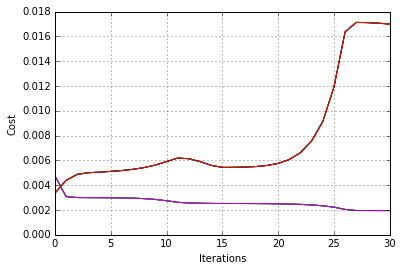

In [7]:
plot(T.J)
plot(T.testJ)
grid(1)
xlabel('Iterations')
ylabel('Cost')

In [8]:
NN.costFunctionPrime(X,y)

(array([[  3.30712413e-06,   1.05483095e-04,   1.16315710e-04,
          -3.65629594e-05,  -7.58958930e-05],
        [ -3.02421726e-05,   2.14948635e-06,   7.15185733e-05,
           5.88328359e-05,   6.67539689e-05]]), array([[  1.16458621e-05],
        [ -4.06836790e-05],
        [ -7.54319140e-05],
        [ -6.16158205e-06],
        [  1.55307286e-05]]))

In [9]:
NN.forward(X)

array([[ 0.73750021],
       [ 0.77335622],
       [ 0.87770323],
       [ 0.80278231]])

In [10]:
y

array([[ 0.75],
       [ 0.82],
       [ 0.93],
       [ 0.7 ]])

In [11]:
#Test network for various combinations of sleep/study:
hoursSleep = linspace(0, 10, 100)
hoursStudy = linspace(0, 5, 100)

#Normalize data (same way training data way normalized)
hoursSleepNorm = hoursSleep/10.
hoursStudyNorm = hoursStudy/5.

#Create 2-d versions of input for plotting
a, b  = meshgrid(hoursSleepNorm, hoursStudyNorm)

#Join into a single input matrix:
allInputs = np.zeros((a.size, 2))
allInputs[:, 0] = a.ravel()
allInputs[:, 1] = b.ravel()

In [12]:
allOutputs = NN.forward(allInputs)

In [13]:
allOutputs

array([[ 0.58652129],
       [ 0.59066483],
       [ 0.59479522],
       ..., 
       [ 0.87937889],
       [ 0.88068722],
       [ 0.88197643]])

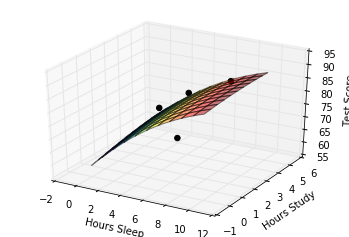

In [14]:
#3D plot:
#Uncomment to plot out-of-notebook (you'll be able to rotate)
#%matplotlib qt

yy = np.dot(hoursStudy.reshape(100,1), np.ones((1,100)))
xx = np.dot(hoursSleep.reshape(100,1), np.ones((1,100))).T

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')

#Scatter training examples:
ax.scatter(10*X[:,0], 5*X[:,1], 100*y, c='k', alpha = 1, s=30)


surf = ax.plot_surface(xx, yy, 100*allOutputs.reshape(100, 100), \
                       cmap=cm.jet, alpha = 0.5)


ax.set_xlabel('Hours Sleep')
ax.set_ylabel('Hours Study')
ax.set_zlabel('Test Score')

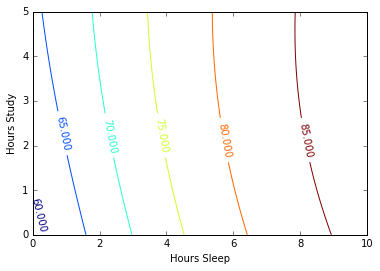

In [15]:
allOutputs = NN.forward(allInputs)

#Contour Plot:
yy = np.dot(hoursStudy.reshape(100,1), np.ones((1,100)))
xx = np.dot(hoursSleep.reshape(100,1), np.ones((1,100))).T

CS = contour(xx,yy,100*allOutputs.reshape(100, 100))
clabel(CS, inline=1, fontsize=10)
xlabel('Hours Sleep')
ylabel('Hours Study')